# Lecture 1 - Data preprocessing

## Data Preprocessing for Machine Learning

- [link](https://medium.com/better-programming/data-preprocessing-for-machine-learning-3822ace03ae6);
- Data cleaning:
  - Missing data - removing (>50% missing), or extrapolating (prone to error);
  - Noisy data - resolve by binning/bucketing, regression, clustering;
- Data transformation:
  - Aggregation - ;
  - Normalization;
  - Feature selection;
  - Discretization;
  - Concept hierarchy generation;
  - Generalization;
- Data reduction:
  - Feature selection;
  - Dimensionality reduction;
  - Numerosity reduction;
    - Parametric - linear-regression;
    - Non-parametric - histograms, data sampling, data cube aggregation;

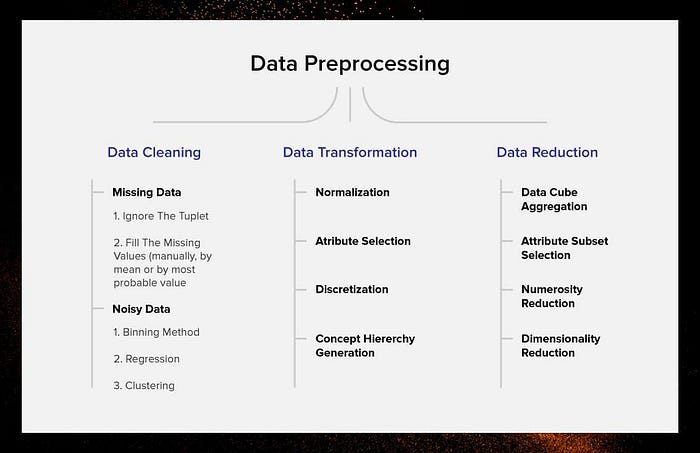

## Data Preprocessing Guide for Every Data Scientist

- [link](https://towardsdatascience.com/introduction-to-data-preprocessing-67a67c42a036/);
- module `sklearn.preprocessing`;
- Standardization - mean 0, std. dev. 1 - `scale()`, `StandardScaler`, `MinMaxScaler`, `MinAbsScaler`;
- Normalization - values fall into open interval $[-1, 1]$ - `normalize()`, `Normalizer`;
- Encoding categorical data - encoding categories with numbers (machine readable data) - `OrdinalEncoder`, `OneHotEncoder`;
- Discretization - continuous to discrete (quantization, binning) - `KBinsDiscretizer`;
- Imputation of missing values - `sklearn.impute.SimpleImputer`;
- Generating polynomial features - `PolynomialFeatures`;
- Custom transformers - `FunctionTransformer`;

Below you can see some examples I've been practicing on...

In [1]:
%pip install scikit-learn
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, MaxAbsScaler, normalize, Normalizer

x = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

scalers = {
    "standard": StandardScaler(),
    "min_max": MinMaxScaler(),
    "max_abs": MaxAbsScaler()
}

normalizer = Normalizer()

x_scaled = scale(x)
x_standard = scalers['standard'].fit_transform(x)
x_min_max = scalers['min_max'].fit_transform(x)
x_max_abs = scalers['max_abs'].fit_transform(x)
x_normalize = normalize(x)
x_normalized = normalizer.fit_transform(x)

def print_stats(data, name):
    print(f'\n=====  {name}  =====\n')
    print(data)
    print(f'\nStatistics:')
    print(f'  Mean:     {np.mean(data, axis=0)}')
    print(f'  Std Dev:  {np.std(data, axis=0)}')
    print(f'  Min:      {np.min(data, axis=0)}')
    print(f'  Max:      {np.max(data, axis=0)}')
    print(f'  Median:   {np.median(data, axis=0)}')
    print(f'  Variance: {np.var(data, axis=0)}')
    print(f'  Range:    {np.ptp(data, axis=0)}')

print_stats(x, 'Original')
print_stats(x_scaled, 'Scaled (scale function)')
print_stats(x_standard, 'Standardized (StandardScaler)')
print_stats(x_min_max, 'MinMax Scaled')
print_stats(x_max_abs, 'MaxAbs Scaled')
print_stats(x_normalize, 'Normalized (normalize function)')
print_stats(x_normalized, 'Normalized (Normalizer)')


=====  Original  =====

[[1 2 3]
 [4 5 6]
 [7 8 9]]

Statistics:
  Mean:     [4. 5. 6.]
  Std Dev:  [2.44948974 2.44948974 2.44948974]
  Min:      [1 2 3]
  Max:      [7 8 9]
  Median:   [4. 5. 6.]
  Variance: [6. 6. 6.]
  Range:    [6 6 6]

=====  Scaled (scale function)  =====

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

Statistics:
  Mean:     [0. 0. 0.]
  Std Dev:  [1. 1. 1.]
  Min:      [-1.22474487 -1.22474487 -1.22474487]
  Max:      [1.22474487 1.22474487 1.22474487]
  Median:   [0. 0. 0.]
  Variance: [1. 1. 1.]
  Range:    [2.44948974 2.44948974 2.44948974]

=====  Standardized (StandardScaler)  =====

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

Statistics:
  Mean:     [0. 0. 0.]
  Std Dev:  [1. 1. 1.]
  Min:      [-1.22474487 -1.22474487 -1.22474487]
  Max:      [1.22474487 1.22474487 1.22474487]
  Median:   [0. 0. 0.]
  Varian

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import (
    Normalizer, LabelEncoder, OneHotEncoder, OrdinalEncoder,
    KBinsDiscretizer, Binarizer, PolynomialFeatures, FunctionTransformer
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin

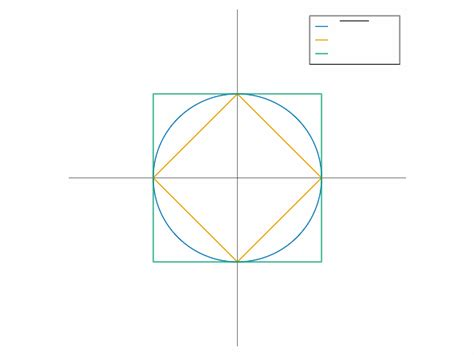
- L1, L2, Linf norms (respectively Manhattan, Euclid, Max)

In [4]:
# ==================== NORMALIZATION ====================
print("\n" + "="*60)
print("NORMALIZATION (scaling individual samples to unit norm)")
print("="*60)

x_norm = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

normalizers = {
    "L1 (Manhattan)": Normalizer(norm='l1'),
    "L2 (Euclidean)": Normalizer(norm='l2'),
    "Max": Normalizer(norm='max')
}

for name, normalizer in normalizers.items():
    x_normalized = normalizer.fit_transform(x_norm)
    print_stats(x_normalized, f'{name} Normalized')
    # Show row norms to verify normalization
    if 'L1' in name:
        row_norms = np.linalg.norm(x_normalized, ord=1, axis=1)
    elif 'L2' in name:
        row_norms = np.linalg.norm(x_normalized, ord=2, axis=1)
    else:  # Max
        row_norms = np.max(np.abs(x_normalized), axis=1)
    print(f'Row norms: {row_norms}')


NORMALIZATION (scaling individual samples to unit norm)

=====  L1 (Manhattan) Normalized  =====

[[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]
 [0.29166667 0.33333333 0.375     ]]

Statistics:
  Mean:     [0.24166667 0.33333333 0.425     ]
  Std Dev:  [0.05400617 0.         0.05400617]
  Min:      [0.16666667 0.33333333 0.375     ]
  Max:      [0.29166667 0.33333333 0.5       ]
  Median:   [0.26666667 0.33333333 0.4       ]
  Variance: [0.00291667 0.         0.00291667]
  Range:    [0.125 0.    0.125]
Row norms: [1. 1. 1.]

=====  L2 (Euclidean) Normalized  =====

[[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]
 [0.50257071 0.57436653 0.64616234]]

Statistics:
  Mean:     [0.40855809 0.55956396 0.71056984]
  Std Dev:  [0.10171688 0.01780475 0.06629952]
  Min:      [0.26726124 0.53452248 0.64616234]
  Max:      [0.50257071 0.57436653 0.80178373]
  Median:   [0.45584231 0.56980288 0.68376346]
  Variance: [0.01034632 0.00031701 0.0043956

In [5]:
# ==================== ENCODING CATEGORICAL FEATURES ====================
print("\n" + "="*60)
print("ENCODING CATEGORICAL FEATURES")
print("="*60)

# Sample categorical data
categories = np.array(['red', 'blue', 'green', 'blue', 'red', 'green', 'red'])
ordinal_data = np.array(['low', 'medium', 'high', 'medium', 'low', 'high', 'medium'])

print(f'\n-----  Original Categorical Data  -----')
print(f'Colors: {categories}')
print(f'Levels: {ordinal_data}')

# Label Encoding
label_enc = LabelEncoder()
colors_label = label_enc.fit_transform(categories)
print(f'\n-----  Label Encoded (Colors)  -----')
print(f'Encoded: {colors_label}')
print(f'Classes: {label_enc.classes_}')
print(f'Unique values: {np.unique(colors_label)}')

# Ordinal Encoding (with specified order)
ordinal_enc = OrdinalEncoder(categories=[['low', 'medium', 'high']])
levels_ordinal = ordinal_enc.fit_transform(ordinal_data.reshape(-1, 1))
print(f'\n-----  Ordinal Encoded (Levels)  -----')
print(f'Encoded: {levels_ordinal.flatten()}')
print(f'Categories: {ordinal_enc.categories_}')

# One-Hot Encoding
onehot_enc = OneHotEncoder(sparse_output=False)
colors_onehot = onehot_enc.fit_transform(categories.reshape(-1, 1))
print(f'\n-----  One-Hot Encoded (Colors)  -----')
print(f'Shape: {colors_onehot.shape}')
print(f'Categories: {onehot_enc.categories_}')
print(colors_onehot)


ENCODING CATEGORICAL FEATURES

-----  Original Categorical Data  -----
Colors: ['red' 'blue' 'green' 'blue' 'red' 'green' 'red']
Levels: ['low' 'medium' 'high' 'medium' 'low' 'high' 'medium']

-----  Label Encoded (Colors)  -----
Encoded: [2 0 1 0 2 1 2]
Classes: ['blue' 'green' 'red']
Unique values: [0 1 2]

-----  Ordinal Encoded (Levels)  -----
Encoded: [0. 1. 2. 1. 0. 2. 1.]
Categories: [array(['low', 'medium', 'high'], dtype=object)]

-----  One-Hot Encoded (Colors)  -----
Shape: (7, 3)
Categories: [array(['blue', 'green', 'red'], dtype='<U5')]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [6]:
# ==================== DISCRETIZATION ====================
print("\n" + "="*60)
print("DISCRETIZATION (binning continuous values)")
print("="*60)

x_discrete = np.array([1.5, 3.2, 5.8, 7.1, 9.3, 2.4, 6.7, 8.9]).reshape(-1, 1)

print(f'\n-----  Original Continuous Data  -----')
print(f'Values: {x_discrete.flatten()}')
print(f'Mean: {np.mean(x_discrete):.2f}')
print(f'Std: {np.std(x_discrete):.2f}')
print(f'Min: {np.min(x_discrete):.2f}')
print(f'Max: {np.max(x_discrete):.2f}')

# Uniform binning (equal width)
uniform_disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
x_uniform = uniform_disc.fit_transform(x_discrete)
print(f'\n-----  Uniform Binning (3 bins)  -----')
print(f'Bins: {x_uniform.flatten()}')
print(f'Bin edges: {uniform_disc.bin_edges_}')
print(f'Unique bins: {np.unique(x_uniform)}')

# Quantile binning (equal frequency)
quantile_disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
x_quantile = quantile_disc.fit_transform(x_discrete)
print(f'\n-----  Quantile Binning (3 bins)  -----')
print(f'Bins: {x_quantile.flatten()}')
print(f'Bin edges: {quantile_disc.bin_edges_}')

# K-means binning
kmeans_disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
x_kmeans = kmeans_disc.fit_transform(x_discrete)
print(f'\n-----  K-means Binning (3 bins)  -----')
print(f'Bins: {x_kmeans.flatten()}')
print(f'Bin edges: {kmeans_disc.bin_edges_}')

# Binarization (threshold-based)
binarizer = Binarizer(threshold=5.0)
x_binary = binarizer.fit_transform(x_discrete)
print(f'\n-----  Binarization (threshold=5.0)  -----')
print(f'Binary: {x_binary.flatten()}')
print(f'Sum (count above threshold): {np.sum(x_binary)}')


DISCRETIZATION (binning continuous values)

-----  Original Continuous Data  -----
Values: [1.5 3.2 5.8 7.1 9.3 2.4 6.7 8.9]
Mean: 5.61
Std: 2.76
Min: 1.50
Max: 9.30

-----  Uniform Binning (3 bins)  -----
Bins: [0. 0. 1. 2. 2. 0. 2. 2.]
Bin edges: [array([1.5, 4.1, 6.7, 9.3])]
Unique bins: [0. 1. 2.]

-----  Quantile Binning (3 bins)  -----
Bins: [0. 0. 1. 2. 2. 0. 1. 2.]
Bin edges: [array([1.5       , 4.06666667, 6.96666667, 9.3       ])]

-----  K-means Binning (3 bins)  -----
Bins: [0. 0. 1. 1. 2. 0. 1. 2.]
Bin edges: [array([1.5       , 4.45      , 7.81666667, 9.3       ])]

-----  Binarization (threshold=5.0)  -----
Binary: [0. 0. 1. 1. 1. 0. 1. 1.]
Sum (count above threshold): 5.0


/home/mih/anaconda3/envs/jupyter_env/lib/python3.13/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [7]:
# ==================== IMPUTATION OF MISSING VALUES ====================
print("\n" + "="*60)
print("IMPUTATION OF MISSING VALUES")
print("="*60)

# Data with missing values
x_missing = np.array([
    [1, 2, np.nan],
    [4, np.nan, 6],
    [7, 8, 9],
    [np.nan, 5, 3],
    [10, 11, 12],
])

print(f'\n-----  Original Data with Missing Values  -----')
print(x_missing)
print(f'Total missing values: {np.isnan(x_missing).sum()}')
print(f'Missing per column: {np.isnan(x_missing).sum(axis=0)}')

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
x_mean = mean_imputer.fit_transform(x_missing)
print(f'\n-----  Mean Imputation  -----')
print(x_mean)
print(f'Imputed values (means): {mean_imputer.statistics_}')
print_stats(x_mean, 'Stats After Mean Imputation')

# Median imputation
median_imputer = SimpleImputer(strategy='median')
x_median = median_imputer.fit_transform(x_missing)
print(f'\n-----  Median Imputation  -----')
print(x_median)
print(f'Imputed values (medians): {median_imputer.statistics_}')

# Most frequent (mode) imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
x_mode = mode_imputer.fit_transform(x_missing)
print(f'\n-----  Most Frequent Imputation  -----')
print(x_mode)
print(f'Imputed values (mode): {mode_imputer.statistics_}')

# Constant imputation
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
x_constant = constant_imputer.fit_transform(x_missing)
print(f'\n-----  Constant Imputation (fill_value=0)  -----')
print(x_constant)

# KNN imputation
knn_imputer = KNNImputer(n_neighbors=2)
x_knn = knn_imputer.fit_transform(x_missing)
print(f'\n-----  KNN Imputation (k=2)  -----')
print(x_knn)
print_stats(x_knn, 'After KNN Imputation')

print("\n" + "="*60)


IMPUTATION OF MISSING VALUES

-----  Original Data with Missing Values  -----
[[ 1.  2. nan]
 [ 4. nan  6.]
 [ 7.  8.  9.]
 [nan  5.  3.]
 [10. 11. 12.]]
Total missing values: 3
Missing per column: [1 1 1]

-----  Mean Imputation  -----
[[ 1.   2.   7.5]
 [ 4.   6.5  6. ]
 [ 7.   8.   9. ]
 [ 5.5  5.   3. ]
 [10.  11.  12. ]]
Imputed values (means): [5.5 6.5 7.5]

=====  Stats After Mean Imputation  =====

[[ 1.   2.   7.5]
 [ 4.   6.5  6. ]
 [ 7.   8.   9. ]
 [ 5.5  5.   3. ]
 [10.  11.  12. ]]

Statistics:
  Mean:     [5.5 6.5 7.5]
  Std Dev:  [3. 3. 3.]
  Min:      [1. 2. 3.]
  Max:      [10. 11. 12.]
  Median:   [5.5 6.5 7.5]
  Variance: [9. 9. 9.]
  Range:    [9. 9. 9.]

-----  Median Imputation  -----
[[ 1.   2.   7.5]
 [ 4.   6.5  6. ]
 [ 7.   8.   9. ]
 [ 5.5  5.   3. ]
 [10.  11.  12. ]]
Imputed values (medians): [5.5 6.5 7.5]

-----  Most Frequent Imputation  -----
[[ 1.  2.  3.]
 [ 4.  2.  6.]
 [ 7.  8.  9.]
 [ 1.  5.  3.]
 [10. 11. 12.]]
Imputed values (mode): [1. 2. 3.]



In [8]:
# ==================== POLYNOMIAL FEATURES ====================
print("\n" + "="*60)
print("GENERATING POLYNOMIAL FEATURES")
print("="*60)

x_poly = np.array([
    [2, 3],
    [4, 5],
    [6, 7],
])

print(f'\n-----  Original Data  -----')
print(x_poly)
print(f'Shape: {x_poly.shape}')
print(f'Mean: {np.mean(x_poly, axis=0)}')
print(f'Std: {np.std(x_poly, axis=0)}')

# Degree 2 polynomial features (with bias/intercept)
poly2 = PolynomialFeatures(degree=2, include_bias=True)
x_poly2_bias = poly2.fit_transform(x_poly)
print(f'\n-----  Polynomial Features (degree=2, with bias)  -----')
print(x_poly2_bias)
print(f'Shape: {x_poly2_bias.shape}')
print(f'Feature names: {poly2.get_feature_names_out(["x1", "x2"])}')
print(f'Number of features: {x_poly2_bias.shape[1]}')

# Degree 2 polynomial features (without bias)
poly2_no_bias = PolynomialFeatures(degree=2, include_bias=False)
x_poly2 = poly2_no_bias.fit_transform(x_poly)
print(f'\n-----  Polynomial Features (degree=2, no bias)  -----')
print(x_poly2)
print(f'Shape: {x_poly2.shape}')
print(f'Feature names: {poly2_no_bias.get_feature_names_out(["x1", "x2"])}')

# Degree 3 polynomial features
poly3 = PolynomialFeatures(degree=3, include_bias=False)
x_poly3 = poly3.fit_transform(x_poly)
print(f'\n-----  Polynomial Features (degree=3, no bias)  -----')
print(x_poly3)
print(f'Shape: {x_poly3.shape}')
print(f'Feature names: {poly3.get_feature_names_out(["x1", "x2"])}')

# Only interaction features (no polynomial)
poly_interact = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_interact = poly_interact.fit_transform(x_poly)
print(f'\n-----  Interaction Features Only (degree=2)  -----')
print(x_interact)
print(f'Shape: {x_interact.shape}')
print(f'Feature names: {poly_interact.get_feature_names_out(["x1", "x2"])}')


GENERATING POLYNOMIAL FEATURES

-----  Original Data  -----
[[2 3]
 [4 5]
 [6 7]]
Shape: (3, 2)
Mean: [4. 5.]
Std: [1.63299316 1.63299316]

-----  Polynomial Features (degree=2, with bias)  -----
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]
 [ 1.  6.  7. 36. 42. 49.]]
Shape: (3, 6)
Feature names: ['1' 'x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']
Number of features: 6

-----  Polynomial Features (degree=2, no bias)  -----
[[ 2.  3.  4.  6.  9.]
 [ 4.  5. 16. 20. 25.]
 [ 6.  7. 36. 42. 49.]]
Shape: (3, 5)
Feature names: ['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']

-----  Polynomial Features (degree=3, no bias)  -----
[[  2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  4.   5.  16.  20.  25.  64.  80. 100. 125.]
 [  6.   7.  36.  42.  49. 216. 252. 294. 343.]]
Shape: (3, 9)
Feature names: ['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2' 'x1^3' 'x1^2 x2' 'x1 x2^2' 'x2^3']

-----  Interaction Features Only (degree=2)  -----
[[ 2.  3.  6.]
 [ 4.  5. 20.]
 [ 6.  7. 42.]]
Shape: (3, 3)
Feature names: ['x1' 'x2' 'x1 x2']


In [9]:
# ==================== CUSTOM TRANSFORMERS ====================
print("\n" + "="*60)
print("CUSTOM TRANSFORMERS")
print("="*60)

# Sample data for custom transformers
x_custom = np.array([
    [1, 10, 100],
    [2, 20, 200],
    [3, 30, 300],
    [4, 40, 400],
])

print(f'\n-----  Original Data for Custom Transformers  -----')
print(x_custom)
print(f'Mean: {np.mean(x_custom, axis=0)}')
print(f'Std: {np.std(x_custom, axis=0)}')


# Method 1: FunctionTransformer (simple function-based)
print(f'\n{"="*60}')
print("METHOD 1: FunctionTransformer (function-based)")
print("="*60)

# Log transformer
log_transformer = FunctionTransformer(np.log1p, validate=True)
x_log = log_transformer.fit_transform(x_custom)
print(f'\n-----  Log Transform (log1p)  -----')
print(x_log)
print(f'Mean: {np.mean(x_log, axis=0)}')

# Square root transformer
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
x_sqrt = sqrt_transformer.fit_transform(x_custom)
print(f'\n-----  Square Root Transform  -----')
print(x_sqrt)
print(f'Mean: {np.mean(x_sqrt, axis=0)}')

# Custom lambda function
power_transformer = FunctionTransformer(lambda x: x ** 2, validate=True)
x_squared = power_transformer.fit_transform(x_custom)
print(f'\n-----  Custom Power Transform (x^2)  -----')
print(x_squared)
print(f'Mean: {np.mean(x_squared, axis=0)}')


# Method 2: Custom Transformer Class (inheriting from BaseEstimator and TransformerMixin)
print(f'\n{"="*60}')
print("METHOD 2: Custom Transformer Classes")
print("="*60)

# Example 1: Column selector transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select specific columns by index"""
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[:, self.columns]

col_selector = ColumnSelector(columns=[0, 2])
x_selected = col_selector.fit_transform(x_custom)
print(f'\n-----  Column Selector (columns 0, 2)  -----')
print(x_selected)
print(f'Original shape: {x_custom.shape}, Selected shape: {x_selected.shape}')


# Example 2: Outlier clipper transformer
class OutlierClipper(BaseEstimator, TransformerMixin):
    """Clip outliers beyond specified number of standard deviations"""
    def __init__(self, n_std=2):
        self.n_std = n_std
        
    def fit(self, X, y=None):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.lower_bound_ = self.mean_ - self.n_std * self.std_
        self.upper_bound_ = self.mean_ + self.n_std * self.std_
        return self
    
    def transform(self, X):
        X_clipped = np.clip(X, self.lower_bound_, self.upper_bound_)
        return X_clipped

# Add some outliers to demonstrate
x_outliers = np.array([
    [1, 10, 100],
    [2, 20, 200],
    [3, 30, 300],
    [100, 40, 400],  # outlier in first column
])

clipper = OutlierClipper(n_std=1)
x_clipped = clipper.fit_transform(x_outliers)
print(f'\n-----  Outlier Clipper (2 std)  -----')
print(f'Original with outlier:')
print(x_outliers)
print(f'\nClipped:')
print(x_clipped)
print(f'Lower bounds: {clipper.lower_bound_}')
print(f'Upper bounds: {clipper.upper_bound_}')


# Example 3: Feature ratio transformer
class FeatureRatioAdder(BaseEstimator, TransformerMixin):
    """Add ratio features between specified column pairs"""
    def __init__(self, ratio_pairs):
        """
        ratio_pairs: list of tuples (numerator_idx, denominator_idx)
        """
        self.ratio_pairs = ratio_pairs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for num_idx, den_idx in self.ratio_pairs:
            ratio = X[:, num_idx] / (X[:, den_idx] + 1e-10)  # avoid division by zero
            ratio = ratio.reshape(-1, 1)
            X_copy = np.concatenate([X_copy, ratio], axis=1)
        return X_copy

ratio_adder = FeatureRatioAdder(ratio_pairs=[(0, 1), (2, 1)])
x_ratios = ratio_adder.fit_transform(x_custom)
print(f'\n-----  Feature Ratio Adder (x0/x1, x2/x1)  -----')
print(x_ratios)
print(f'Original shape: {x_custom.shape}, With ratios: {x_ratios.shape}')


# Example 4: Log scaler transformer
class LogScaler(BaseEstimator, TransformerMixin):
    """Apply log transform and then scale"""
    def __init__(self, base=np.e):
        self.base = base
    
    def fit(self, X, y=None):
        # Apply log transform
        X_log = np.log(X + 1) / np.log(self.base)
        # Calculate scaling parameters
        self.min_ = np.min(X_log, axis=0)
        self.max_ = np.max(X_log, axis=0)
        return self
    
    def transform(self, X):
        X_log = np.log(X + 1) / np.log(self.base)
        X_scaled = (X_log - self.min_) / (self.max_ - self.min_ + 1e-10)
        return X_scaled

log_scaler = LogScaler(base=10)
x_log_scaled = log_scaler.fit_transform(x_custom)
print(f'\n-----  Log Scaler (log base 10 + min-max scaling)  -----')
print(x_log_scaled)
print(f'Min: {np.min(x_log_scaled, axis=0)}')
print(f'Max: {np.max(x_log_scaled, axis=0)}')


# Example 5: Statistical feature adder
class StatisticalFeatureAdder(BaseEstimator, TransformerMixin):
    """Add statistical features computed across row"""
    def __init__(self, add_mean=True, add_std=True, add_min=True, add_max=True):
        self.add_mean = add_mean
        self.add_std = add_std
        self.add_min = add_min
        self.add_max = add_max
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        features = []
        
        if self.add_mean:
            features.append(np.mean(X, axis=1, keepdims=True))
        if self.add_std:
            features.append(np.std(X, axis=1, keepdims=True))
        if self.add_min:
            features.append(np.min(X, axis=1, keepdims=True))
        if self.add_max:
            features.append(np.max(X, axis=1, keepdims=True))
        
        if features:
            X_copy = np.concatenate([X_copy] + features, axis=1)
        
        return X_copy

stat_adder = StatisticalFeatureAdder(add_mean=True, add_std=True, add_min=False, add_max=True)
x_stats = stat_adder.fit_transform(x_custom)
print(f'\n-----  Statistical Feature Adder (mean, std, max per row)  -----')
print(x_stats)
print(f'Original shape: {x_custom.shape}, With stats: {x_stats.shape}')
print(f'Last 3 columns are: row_mean, row_std, row_max')


# Combining multiple custom transformers using Pipeline
from sklearn.pipeline import Pipeline

print(f'\n{"="*60}')
print("COMBINING CUSTOM TRANSFORMERS IN PIPELINE")
print("="*60)

pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p)),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('stats', StatisticalFeatureAdder(add_mean=True, add_std=False, add_min=False, add_max=False))
])

x_pipeline = pipeline.fit_transform(x_custom[:, :2])  # Use only first 2 columns
print(f'\n-----  Pipeline: Log -> Poly(2) -> Stats  -----')
print(f'Input shape: {x_custom[:, :2].shape}')
print(f'Output shape: {x_pipeline.shape}')
print(x_pipeline)

print("\n" + "="*60)


CUSTOM TRANSFORMERS

-----  Original Data for Custom Transformers  -----
[[  1  10 100]
 [  2  20 200]
 [  3  30 300]
 [  4  40 400]]
Mean: [  2.5  25.  250. ]
Std: [  1.11803399  11.18033989 111.80339887]

METHOD 1: FunctionTransformer (function-based)

-----  Log Transform (log1p)  -----
[[0.69314718 2.39789527 4.61512052]
 [1.09861229 3.04452244 5.30330491]
 [1.38629436 3.4339872  5.70711026]
 [1.60943791 3.71357207 5.99396143]]
Mean: [1.19687294 3.14749425 5.40487428]

-----  Square Root Transform  -----
[[ 1.          3.16227766 10.        ]
 [ 1.41421356  4.47213595 14.14213562]
 [ 1.73205081  5.47722558 17.32050808]
 [ 2.          6.32455532 20.        ]]
Mean: [ 1.53656609  4.85904863 15.36566092]

-----  Custom Power Transform (x^2)  -----
[[     1    100  10000]
 [     4    400  40000]
 [     9    900  90000]
 [    16   1600 160000]]
Mean: [7.5e+00 7.5e+02 7.5e+04]

METHOD 2: Custom Transformer Classes

-----  Column Selector (columns 0, 2)  -----
[[  1 100]
 [  2 200]
 [  3

## Data Preprocessing in Machine Learning: 11 Key Steps You Must Know!

- [link](https://www.upgrad.com/blog/data-preprocessing-in-machine-learning/)

## Feature Engineering in Python

- [link](https://towardsdatascience.com/feature-engineering-in-python-2fdb9bb8ee7a/);

> Applied machine learning is basically feature engineering. (Andrew Ng)

- Common feature engineering - handling missing values, handling outliers, binning numerical values, encoding categorical features, numerical transformations, scaling numerical features, extracting parts of the date;
- [Feature engineering tutorials](https://github.com/rasgointelligence/feature-engineering-tutorials) - this is the most important part; doing the tutorials (w/ optional comments):

- [ ] Feature Profiling
    - [ ] [pandas-profiling](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-profiling/pandas-profiling.ipynb)
    - [ ] [SweetViz](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-profiling/SweetViz-profiling.ipynb)
- [ ] Data Cleaning
    - [ ] [Missing Data](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/data-cleaning/pandas-missing-data.ipynb)
    - [ ] [Duplicate Data](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/data-cleaning/pandas-duplicate-data.ipynb)
    - [ ] [Data Type Mismatch](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/data-cleaning/pandas-data-type-mismatch.ipynb)
    - [ ] [Date Gaps in Time Series](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/data-cleaning/pandas-date-gaps.ipynb)
- [ ] Feature Transformation
    - [ ] Time-series
        - [ ] [Lag](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-lag.ipynb)
        - [ ] [Moving Average](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-moving-average.ipynb)
        - [ ] [Weekly Resampled Aggregation](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-aggregate-weekly.ipynb)
        - [ ] [Weekly Rolling Aggregation](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-aggregate-rolling-weekly.ipynb)
        - [ ] [Velocity and Acceleration](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-velocity-acceleration.ipynb)
        - [ ] [Energy](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-energy.ipynb)
        - [ ] [Mean Difference](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-mean-difference.ipynb)
        - [ ] [Mean Absolute Difference](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/pandas-mean-absolute-difference.ipynb)
        - [ ] [tsfresh](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/time-series/tsfresh.ipynb)
    - [ ] Categorical
        - [ ] [One-hot encoding](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/categorical/one-hot-encoding.ipynb)
        - [ ] [Target encoding](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/categorical/target-encoding.ipynb)
        - [ ] [Leave One Out encoding](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/categorical/leave-one-out-encoding.ipynb)
    - [ ] Numerical
        - [ ] [Standard scaler](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/numerical/standard-scaler.ipynb)
        - [ ] [Min-Max scaler](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/numerical/min-max-scaler.ipynb)
        - [ ] [Robust scaler](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-transformation/numerical/robust-scaler.ipynb)
- [ ] Model Selection
    - [ ] Train-Test Split
        - [ ] [Time Series Split](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/sklearn-time-series-split.ipynb)
        - [ ] [Train-Test Split](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/sklearn-train-test-split.ipynb)
        - [ ] K-Fold or Cross-Validation
            - [ ] [Random](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/sklearn-cross-validation-split.ipynb)
            - [ ] [Stratified](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/sklearn-stratified-cross-validation-split.ipynb)
            - [ ] [Group](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/sklearn-group-cross-validation-split.ipynb)
    - [ ] Model Comparison
        - [ ] [PyCaret](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-comparison/pycaret-comparison.ipynb)
    - [ ] Model Training
        - [ ] Catboost
            - [ ] [Classification](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-training/catboost-classification.ipynb)
            - [ ] [Regression](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-training/catboost-regression.ipynb)
    - [ ] Model Metrics
        - [ ] Binary Classification
            - [ ] [AUC](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-metrics/catboost-categorical-AUC.ipynb)
            - [ ] [Log Loss](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-metrics/catboost-categorical-logloss.ipynb)
        - [ ] Regression
            - [ ] [MAE](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-metrics/catboost-regression-mae.ipynb)
            - [ ] [MAPE](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-metrics/catboost-regression-mape.ipynb)
            - [ ] [RMSE](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-metrics/catboost-regression-rmse.ipynb)
            - [ ] [R^2](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/model-selection/model-metrics/catboost-regression-r2.ipynb)
- [ ] Feature Importance
    - [ ] [Scikit-learn](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-importance/Sklearn%20Feature%20Importance.ipynb)
    - [ ] [XGBoost](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-importance/XGBoost%20Feature%20Importance.ipynb)
    - [ ] [catboost](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-importance/Catboost%20Feature%20Importance.ipynb)
- [ ] Feature Selection
    - [ ] Model Agnostic
        - [ ] [Low Variance](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-selection/model-agnostic/Low%20Variance.ipynb)
        - [ ] Univariate Feature Selection
            - [ ] [F-test](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-selection/model-agnostic/F%20Test.ipynb)
            - [ ] [Mutual Information](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-selection/model-agnostic/Mutual%20Information.ipynb)
    - [ ] Model Based
        - [ ] _Lasso-based Selection (Coming soon)_
        - [ ] Feature Importance
            - [ ] [Scikit-learn Tree-based](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-selection/model-based/sklearn-feature-selection-gini.ipynb)
            - [ ] [Permutation Importance](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-selection/model-based/sklearn-feature-selection-permutation.ipynb)
            - [ ] [SHAP Values](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-selection/model-based/sklearn-feature-selection-shap.ipynb)
        - [ ] Sequential Feature Selection
            - [ ] Forward Stepwise Selection (Coming soon)
            - [ ] Backwards Stepwise Selection
                - [ ] [Scikit-learn Tree-based](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-selection/model-based/sequential-feature-selection/sklearn-backward-stepwise-selection.ipynb)
                - [ ] [catboost](https://github.com/rasgointelligence/feature-engineering-tutorials/blob/main/feature-selection/model-based/sequential-feature-selection/catboost-backward-stepwise-selection.ipynb)

 (the best way is just to fork it and use google collab for the exercises; [here](https://annas-archive.org/md5/bf5170bc02f59d108cf7ad20f03d11bf) you can find my fork)

## The book

- [link](https://annas-archive.org/md5/bf5170bc02f59d108cf7ad20f03d11bf);
- Chapter 2
- Chapter 3
- Chapter 4
- Chapter 5
